# Import des fonctions nécessaires :

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import itertools # Pour créer des iterateurs
import time

import matplotlib.pyplot as plt  # Pour l'affichage d'images
from matplotlib import cm # Pour importer de nouvelles cartes de couleur

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout

%matplotlib inline

# Load the data, the model and prepare samples to evaluate the model

In [25]:
# Define the data filepath and the model filepath
csv_5fam = "/Users/Adrien/DataScientist/projet_Mushroom/reduced_dataset_5_families.csv"
model_path = "/Users/Adrien/DataScientist/projet_Mushroom/checkpoint_effnet/model_efficientNet_20210617.h5"
# Load the file
df = pd.read_csv(csv_5fam)
# keep only interesting datas
df2 = df.drop(['image_id', 'image_url'], axis=1)
# Split the data (like they were splitted during the model training)
X_train_path, X_test_path, y_train, y_test = train_test_split(df2['filepath'], df2['label'], test_size=0.2, random_state=42)
# load the model
print("loading model...")
model = load_model(model_path, custom_objects={'FixedDropout': Dropout})
print("Model loaded !")
print("\nPreparing test images...")
time.sleep(0.2)
# Prepare images for the model evaluation
X_test = []
for filepath in tqdm(X_test_path):
    # Lecture du fichier
    im = tf.io.read_file(filepath)
    # On décode le fichier
    im = tf.image.decode_jpeg(im, channels=3)
    # Redimensionnement
    im = tf.image.resize(im, size=(256, 256))
    X_test.append([im])
    
X_test = tf.concat(X_test, axis=0)
# prepare the labels !
#y_test = data_test['label'].astype(int)

loading model...
Model loaded !

Preparing test images...


100%|██████████| 3428/3428 [00:08<00:00, 406.15it/s]


# Predict all images from X_test !
(using argmax because softmax retunrs des probabilites)

In [26]:
#model_path = "/Users/Adrien/DataScientist/projet_Mushroom/checkpoint_effnet/model_efficientNet_20210617.h5"
#print("loading model...")
#model = load_model(model_path)#, custom_objects={'FixedDropout': Dropout})
#print("Model loaded !")

y_prob = model.predict(X_test, batch_size=64, verbose=1)
y_pred = np.argmax(y_prob, axis = 1)

54/54 [==============================] - 131s 2s/step


# Display the results

Matrice de confusion issue du modèle EfficientNetB1:


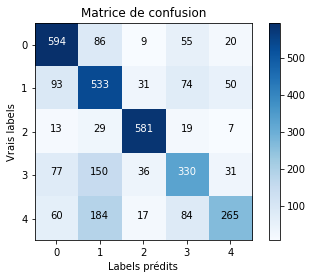



Classification report du modèle EfficientNetB1:

               precision    recall  f1-score   support

           0       0.78      0.71      0.74       837
           1       0.68      0.54      0.60       982
           2       0.90      0.86      0.88       674
           3       0.53      0.59      0.56       562
           4       0.43      0.71      0.54       373

    accuracy                           0.67      3428
   macro avg       0.66      0.68      0.66      3428
weighted avg       0.70      0.67      0.68      3428



In [27]:
## Première étape, la matrice de confusion
cnf_matrix = confusion_matrix(y_test, y_pred)

### Display a nice confusion matrix
##
#
classes = range(0,(df['family'].nunique()))
print("Matrice de confusion issue du modèle EfficientNetB1:")
plt.figure()

plt.imshow(cnf_matrix, interpolation='nearest',cmap='Blues')
plt.title("Matrice de confusion")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, cnf_matrix[i, j],
             horizontalalignment = "center",
             color = "white" if cnf_matrix[i, j] > ( cnf_matrix.max() / 2) else "black")

plt.ylabel('Vrais labels')
plt.xlabel('Labels prédits')
plt.show()
#
##
###



## Seconde étape le classification report

print("\n\nClassification report du modèle EfficientNetB1:\n\n", classification_report(y_pred, y_test))

# Plot few images with their labels

<ipython-input-29-f637260b7e46>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(cc,bb,i+1)


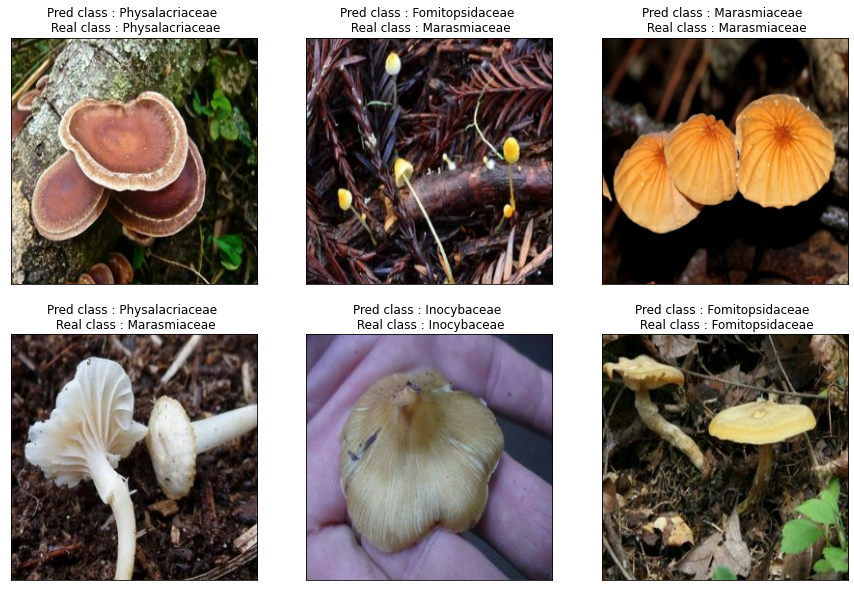

In [29]:
aa = 6 # number of total images to display
bb = 3 # number of colums !

indices_random = tf.random.uniform([aa], 0, len(X_test), dtype=tf.int32)
cc = aa/bb
plt.figure(figsize=(15,10))
for i, idx in enumerate(indices_random):
    plt.subplot(cc,bb,i+1)
    plt.imshow(tf.cast(X_test[idx], tf.int32))
    plt.xticks([])
    plt.yticks([])
    plt.title('Pred class : {} \n Real class : {}'.format(df.family.unique()[y_pred[idx]], df.family.unique()[y_test.values[idx]]))